# Introdução a analise de experimentos

## Importando Bibliotecas

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Construir uma matriz representando todos os ensaios realizados:

In [13]:
ensaios = np.array ([ [-1,-1],[1,-1],[-1,1],[1,1]])      #Trago minhas amostra em um array

In [14]:
experimento = pd.DataFrame(ensaios,columns = ['Farinha', 'Chocolate']) #incluo em um dataframe nomeando cada coluna
experimento

,Farinha,Chocolate
0,-1,-1
1,1,-1
2,-1,1
3,1,1


In [15]:
experimento ['Porcoes'] = [19,37,24,49] #incluo dentro do meu dataframe uma coluna com as porcoes que resultaram esse experimento

In [16]:
experimento

,Farinha,Chocolate,Porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49


## Analisando graficamente o experimento

In [22]:
sns.set_palette('terrain')  #palleta de cores que vou usar 
sns.set_style('darkgrid')  #estilo do grafico

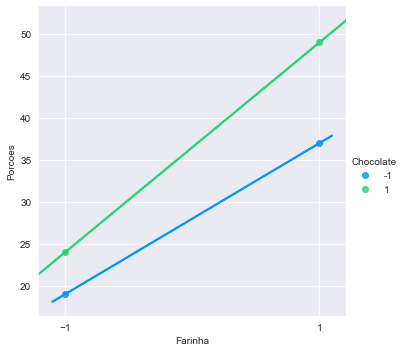

In [26]:
axl = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue = 'Chocolate') #aqui eu consigo já identificar o impacto da farinha dentro do meu experimento 
axl.set(xticks = (-1, 1))

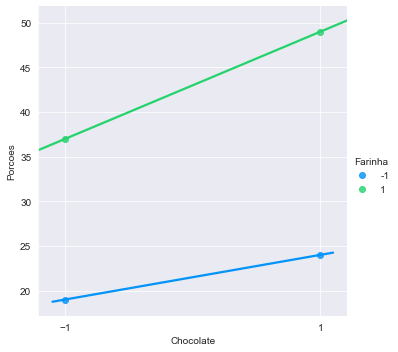

In [27]:
axl2 = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', ci = None, hue = 'Farinha') #O efeito de chocolate aqui é uma relacao positiva entre o chocolate e a farinha
axl2.set(xticks = (-1, 1))

## Duas grandes hipóteses através da comparação entre esses gráficos. A primeira, que há provavelmente um efeito de interação entre a farinha e o chocolate e segundo, que a farinha, ela possui maior influência na quantidade de cupcakes produzidos.

# Ajuste do modelo estatístico 

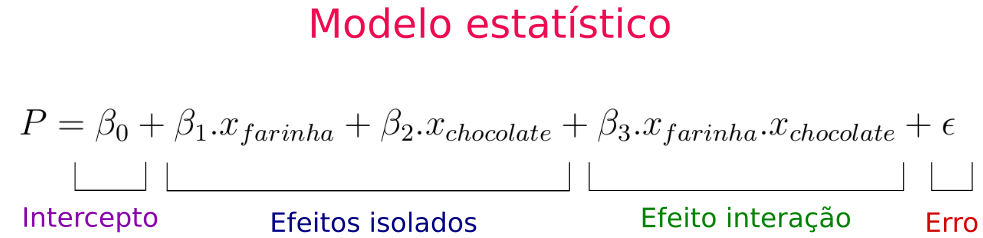

In [32]:
modelo = smf.ols(data=experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')   #aqui eu aplico o ajuste para entender e encontrar os valores de beta zero, beta um, beta dois e beta três do meu modelo estatistico

In [33]:
modelos_ajustado = modelo.fit()

In [36]:
print(modelos_ajustado.summary())  #aqui eu obtendo o resultado dos coeficientes dos modelos 

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                nan
Time:                        15:12:50   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWar

In [37]:
centro = np.array ([ [0,0,29],    #criei uma matriz pois preciso aumenta meu grau de liberdade no teste (grau de liberdade é o quanto eu consigo ter como assertiv os numero que foram incluidos como Beta 0, Beta por ia vai)
                     [0,0,30],
                     [0,0,29],
                     [0,0,30], ])

In [38]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4,5,6,7]) #inclui a minha lista de array dentro de um dataframe

In [39]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [41]:
experimento = experimento.append(centro_dataframe) #Inclui o Dataframe dentro do Dataframe original que é o de experimento
experimento 

C:\Users\patricia.sousa\AppData\Local\Temp\ipykernel_17188\2549858177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_dataframe)


,Farinha,Chocolate,Porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30
4,0,0,29
5,0,0,30


# Análise de significancia estatística

In [42]:
modelo = smf.ols(data=experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [43]:
modelos_ajustado = modelo.fit()

In [45]:
print(modelos_ajustado.summary())  #Os coficientes devem ser acima de 0, então eu inclui mais testes no experimento, inclui no dataframe e fiz novamente o ajuste estatistico para que eu consiga ter liberdade para fazer o testes =

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     65.77
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.58e-06
Time:                        17:36:26   Log-Likelihood:                -20.709
No. Observations:                  12   AIC:                             49.42
Df Residuals:                       8   BIC:                             51.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.4167      0.48

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 ### Analisando esse teste de significancia consigo identificar analisando P>| T| (Os valores de P > |t| (probabilidade de um parâmetro ajustado ser igual a zero)
 
 - o intercepto, ele tem uma probabilidade zero de a hipótese nula ser verdadeira, logo, este parâmetro, ele é estatisticamente significativo e para ele
 - A farinha também tem uma probabilidade zero de a hipótese nula ser verdadeira, logo, vou ficar com a hipótese alternativa e vou dizer que esse parâmetro, ele é estatisticamente significativo
 - Para o chocolate tem uma probabilidade 1.3% é menor do que aquele limite de 5%  definido, vou rejeitar para este caso a hipótese nula ele é diferente de zero e é estatisticamente significativo.
 - A interação ao efeito de inteiração entre a farinha e o chocolatee eu multiplicar esse valor aqui por cem, 15.6%, ele é maior do que aquele limite definido 
 
 ##### Logo eu posso afirmar estatitiscamente que a interação não é estatisticamente significativa no estudo, ou seja no ponto de vista estatistico não influencia a quantidade de cupcakpes produzidos

## Gráfico padronizado de Pareto

In [48]:
t_valores = modelos_ajustado.tvalues      #vou construir uma visualização de grafico de pareto com o resultado do meu teste de probabilidade
t_valores 

Intercept            63.299028
Farinha              12.916155
Chocolate             5.106387
Farinha:Chocolate     2.102630
dtype: float64

In [50]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [54]:
from scipy import stats

In [56]:
distribuicao = stats.t(df=4)

In [57]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [60]:
limite = [distribuicao.ppf(q = 1 -0.025)]*len (nome)
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

 ## Plotar grafico

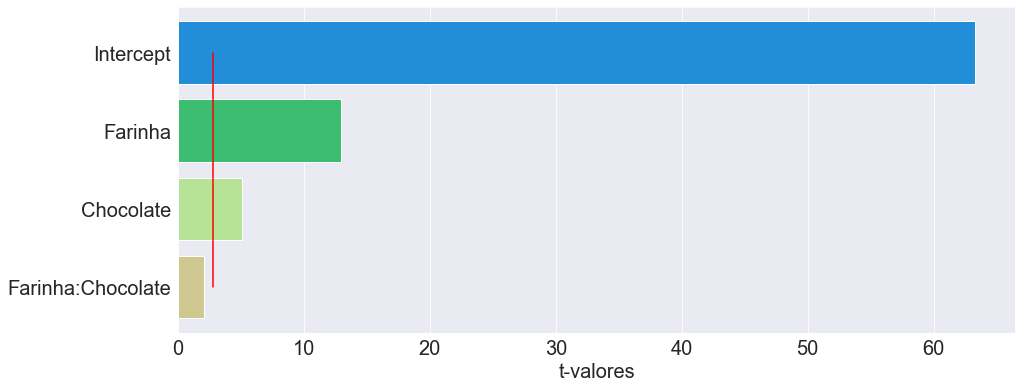

In [61]:
 pareto = sns.barplot(x = t_valores, y = nome)
 pareto.figure.set_size_inches (15,6)
 pareto.tick_params(labelsize = 20)
 pareto.set_xlabel('t-valores', fontsize =20)

pareto.plot(limite, nome, 'r')